Waiting for OCR to complete...


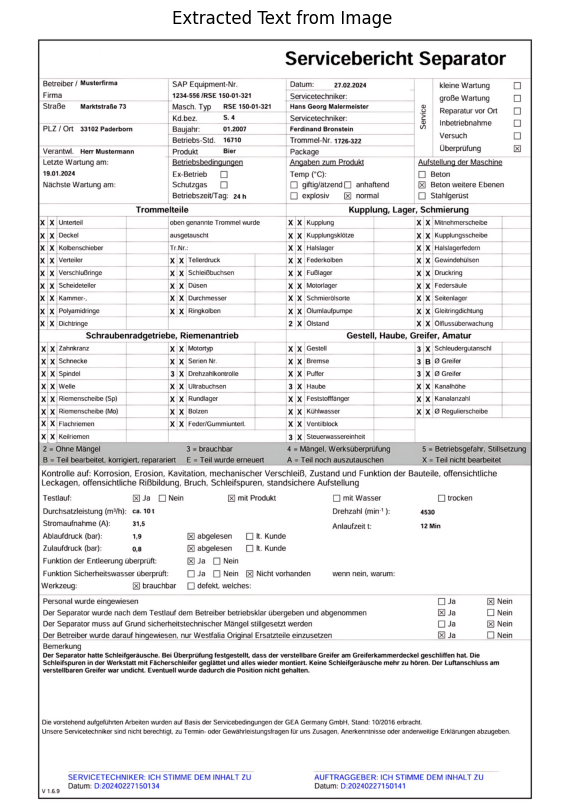

Extracted Text:
Servicebericht Separator
Betreiber / Musterfirma
SAP Equipment-Nr.
Datum:
27.02.2024
kleine Wartung
Firma
1234-556 /RSE 150-01-321
Servicetechniker:
große Wartung
Straße
Marktstraße 73
Masch. Typ
RSE 150-01-321
Hans Georg Malermeister
Reparatur vor Ort
Kd.bez.
S. 4
Servicetechniker:
PLZ / Ort 33102 Paderborn
Baujahr:
01.2007
Ferdinand Bronstein
Inbetriebnahme
Service
Betriebs-Std.
16710
Trommel-Nr. 1726-322
Versuch
Verantwl. Herr Mustermann
Produkt
Bier
Package
Überprüfung
X
Letzte Wartung am:
Betriebsbedingungen
Angaben zum Produkt
Aufstellung der Maschine
19.01.2024
Ex-Betrieb
Temp (℃):
Betor
Nächste Wartung am:
Schutzgas
giftig/ätzend [] anhaftend
Beton weitere Ebenen
Betriebszeit/Tag: 24 h
explosiv
] normal
Stahlgerüst
Trommelteile
Kupplung, Lager, Schmierung
X X |Unterteil
oben genannte Trommel wurde
X X |Kupplung
X X Mitnehmerscheibe
X Deckel
ausgetauscht
X X Kupplungsklötze
X X |Kupplungsscheibe
X Kolbenschieber
Tr.Nr .:
X X Halslager
X X Halslagerfedern
X X Vert

In [4]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image
import io
import time
import matplotlib.pyplot as plt

subscription_key = "a4905a6a4caf4faf843630d49d0d1ace"
endpoint = "https://jamil.cognitiveservices.azure.com/"

def extract_text_from_image(image_path):
    client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

    with open(image_path, 'rb') as image_stream:
        # Call Azure OCR
        read_response = client.read_in_stream(image_stream, raw=True)
        read_operation_location = read_response.headers["Operation-Location"]
        operation_id = read_operation_location.split("/")[-1]

        # Retrieve the results
        while True:
            read_result = client.get_read_result(operation_id)
            if read_result.status.lower() not in ['notstarted', 'running']:
                break
            print('Waiting for OCR to complete...')
            time.sleep(5)

        if read_result.status == 'succeeded':
            extracted_text = ""
            for page in read_result.analyze_result.read_results:
                for line in page.lines:
                    extracted_text += line.text + "\n"

            # Visualize the extracted text
            pil_image = Image.open(image_path)
            plt.figure(figsize=(10, 10))
            plt.imshow(pil_image)
            plt.axis('off')
            plt.title(f"Extracted Text from Image")
            plt.show()

            # Print the extracted text to the console
            print(f"Extracted Text:\n{extracted_text}")

# Example usage
image_path = r'C:\Users\GenAI#3\Desktop\docAI\image1.png'
extract_text_from_image(image_path)
#hello how are you

In [27]:
import cv2
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image
import io
import time
import matplotlib.pyplot as plt

# Azure OCR credentials
subscription_key = "a4905a6a4caf4faf843630d49d0d1ace"
endpoint = "https://jamil.cognitiveservices.azure.com/"

# List to store the coordinates of the predefined areas
predefined_areas = []
# Variable to store the top-left and bottom-right coordinates of the rectangle
rect_start = None
rect_end = None

# Callback function to draw a rectangle
def draw_rectangle(event, x, y, flags, param):
    global rect_start, rect_end, predefined_areas, image_copy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # Record the starting point of the rectangle
        rect_start = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        # Record the ending point of the rectangle and save the area
        rect_end = (x, y)
        x1, y1 = rect_start
        x2, y2 = rect_end
        predefined_areas.append((min(x1, x2), min(y1, y2), abs(x2 - x1), abs(y2 - y1)))
        print(f"Defined area: {predefined_areas[-1]}")

        # Draw the rectangle on the image
        cv2.rectangle(image_copy, rect_start, rect_end, (0, 255, 0), 2)
        cv2.imshow("Image", image_copy)

# Function to perform OCR on the segmented areas
def extract_text_from_segments(image_path, predefined_areas):
    client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
    image = cv2.imread(image_path)
    
    extracted_text = ""
    
    for i, (x, y, w, h) in enumerate(predefined_areas):
        # Crop the segment from the image
        segment = image[y:y+h, x:x+w]
        
        # Convert segment to bytes
        is_success, buffer = cv2.imencode(".jpg", segment)
        segment_bytes = io.BytesIO(buffer.tobytes())
        
        # Call Azure OCR on the segment
        read_response = client.read_in_stream(segment_bytes, raw=True)
        read_operation_location = read_response.headers["Operation-Location"]
        operation_id = read_operation_location.split("/")[-1]
        
        # Retrieve the results
        while True:
            read_result = client.get_read_result(operation_id)
            if read_result.status.lower() not in ['notstarted', 'running']:
                break
            print('Waiting for OCR to complete...')
            time.sleep(5)
        
        if read_result.status == 'succeeded':
            for page in read_result.analyze_result.read_results:
                for line in page.lines:
                    extracted_text += line.text + "\n"
    
    # Print the extracted text to the console
    print(f"Extracted Text:\n{extracted_text}")

    # Visualize the extracted text
    pil_image = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(pil_image)
    plt.axis('off')
    plt.title(f"Extracted Text from Image")
    plt.show()


In [2]:
# Load the image
image_path = r'C:\Users\GenAI#3\Desktop\docAI\preprocessed_image.png'  # Change this to your image path
image = cv2.imread(image_path)
image_copy = image.copy()

# Create a window and set the mouse callback function
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", draw_rectangle)

print("Draw rectangles on the image by clicking and dragging. Press 'q' to quit.")

# Display the image and wait for the user to draw rectangles
while True:
    cv2.imshow("Image", image_copy)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

print("Predefined areas:", predefined_areas)

NameError: name 'cv2' is not defined

Waiting for OCR to complete...
Extracted Text:
Durchsatzleistung (m3/h): ca. 10 t
Drehzahl (min 1 ):
Stromaufnahme (A):
31.5
Anlaufzeit t:
Ablaufdruck (bar):
1,9
x] abgelesen
It. Kunde
Zulaufdruck (bar):
0,8
x] abgelesen
It. Kunde
Funktion der Entleerung überprüft:
X] Ja " Nein
Funktion Sicherheitswasser überprüft:
Ja " Nein X] Nicht vorhanden
wenn nein, warum:
Werkzeug:
x] brauchbar
defekt, welches:



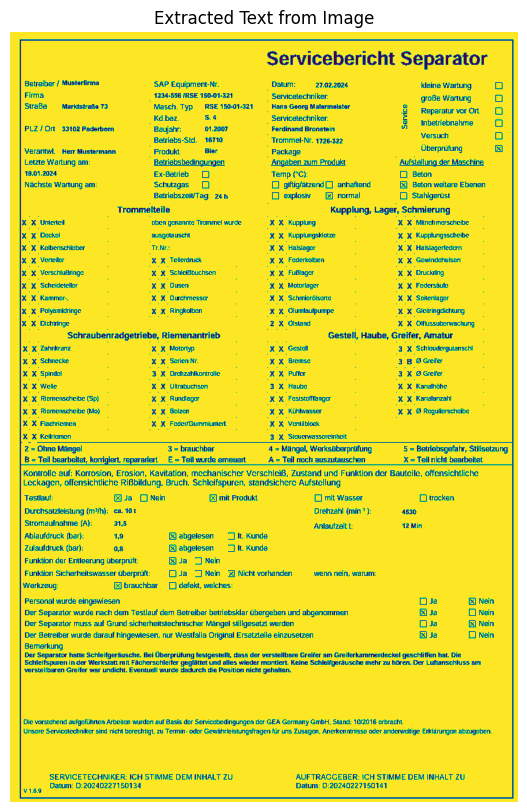

In [29]:
# Perform OCR on the segmented areas
extract_text_from_segments(image_path, predefined_areas)

Azure doesnt allow us to upload small segments

In [1]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient
import os

# Set up your Form Recognizer endpoint and key
endpoint = "https://germanywestcentral.api.cognitive.microsoft.com/"
key = "673e11616c9043f799471d08f4531181"

# Set up the environment variable for your Azure Form Recognizer key and endpoint
os.environ['AZURE_FORM_RECOGNIZER_ENDPOINT'] = endpoint
os.environ['AZURE_FORM_RECOGNIZER_KEY'] = key

def format_bounding_box(bounding_box):
    if not bounding_box:
        return "N/A"
    return ", ".join(["[{}, {}]".format(p.x, p.y) for p in bounding_box])

def analyze_image(image_path):
    document_analysis_client = DocumentAnalysisClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )

    # Read the file into memory
    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    poller = document_analysis_client.begin_analyze_document(
        "prebuilt-read", image_data)
    result = poller.result()

    print("Document contains content: ", result.content)
    
    for idx, style in enumerate(result.styles):
        print(
            "Document contains {} content".format(
                "handwritten" if style.is_handwritten else "no handwritten"
            )
        )

    for page in result.pages:
        print("----Analyzing Read from page #{}----".format(page.page_number))
        print(
            "Page has width: {} and height: {}, measured with unit: {}".format(
                page.width, page.height, page.unit
            )
        )

        for line_idx, line in enumerate(page.lines):
            print(
                "...Line # {} has text content '{}' within bounding box '{}'".format(
                    line_idx,
                    line.content,
                    format_bounding_box(line.polygon),
                )
            )

        for word in page.words:
            print(
                "...Word '{}' has a confidence of {}".format(
                    word.content, word.confidence
                )
            )

    print("----------------------------------------")

if __name__ == "__main__":
    image_path = r'C:\Users\GenAI#3\Desktop\docAI\image1.png'  # Change this to your image path
    analyze_image(image_path)


Document contains content:  Servicebericht Separator
Betreiber / Musterfirma
Firma
Straße
Marktstraße 73
PLZ / Ort 33102 Paderborn
Verantwl. Herr Mustermann Letzte Wartung am:
19.01.2024
Nächste Wartung am:
SAP Equipment-Nr.
1234-556 /RSE 150-01-321
Masch. Typ
RSE 150-01-321
Kd.bez.
S. 4
Baujahr:
01.2007
Betriebs-Std.
16710
Produkt
Bier
Betriebsbedingungen
Ex-Betrieb
Schutzgas
Betriebszeit/Tag: 24 h
Trommelteile
Datum:
27.02.2024
Servicetechniker:
Hans Georg Malermeister
Servicetechniker:
Ferdinand Bronstein
Trommel-Nr. 1726-322
Package
Angaben zum Produkt
Temp (°C):
giftig/ätzend explosiv
anhaftend
normal
kleine Wartung große Wartung
Reparatur vor Ort
Service
Inbetriebnahme
Versuch
Überprüfung
Aufstellung der Maschine
Beton
X Beton weitere Ebenen
Stahlgerüst
Kupplung, Lager, Schmierung
x
x Unterteil
x
x Deckel
x
X Kolbenschieber
x Verteiler
oben genannte Trommel wurde ausgetauscht
Tr.Nr .:
x
× Tellerdruck
x
X
X
x Verschlußringe
x X Schleißbuchsen
x Scheideteller
X X Düsen
x Kammer-,
X